<a href="https://colab.research.google.com/github/ArulselvanMadhavan/CSC508/blob/main/A5_Adni_ParameterTuning_PatData_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Hyper Parameter Tuning notebook! 
Here we go back to the cleaned data set we prepared in the Random Forest notebook. 
We then use the data to train a random forest model (and a gradient boosted tree model) to predict which patient has Alzheimers. Here we focus on how to find the best parameters for getting the best performance our of our machine learning models. 

# Opening the file location and loading libraries

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt

Read the dataset "PatData_cleaned.csv", which we created in the first notebook of module 2. 

In [2]:
url = "https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/PatData_cleaned.csv"
data = pd.read_csv(url)


In [3]:
 data.shape

(1479, 16)

In [4]:
data

,PTID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,DX,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,002_S_0295,84.8,2,18,1,1,1,1.0,NL,43332.500000,6805.125000,1.071568e+06,3752.625000,17693.875000,19420.125000,1.649602e+06
1,002_S_0413,76.3,1,16,1,1,1,0.0,NL,31936.454545,6824.636364,1.055413e+06,4131.090909,20095.909091,20235.545455,1.600009e+06
2,002_S_0559,79.3,2,16,1,1,2,1.0,NL,38410.666667,7496.666667,1.092807e+06,3998.333333,18993.000000,22226.000000,1.703968e+06
3,002_S_0619,77.5,2,12,1,1,1,2.0,Dementia,120529.500000,5812.000000,1.093932e+06,2773.000000,20675.000000,19959.000000,2.070530e+06
4,002_S_0685,89.6,1,16,1,1,1,0.0,NL,40921.571429,7063.250000,9.800458e+05,3894.375000,14152.250000,18133.625000,1.521331e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,941_S_4365,80.3,2,20,1,1,1,0.0,NL,55885.200000,7350.800000,1.105758e+06,4097.500000,19869.000000,20101.250000,1.656876e+06
1475,941_S_4377,69.3,1,12,1,1,2,1.0,MCI,19850.000000,6276.500000,8.546050e+05,3098.750000,14773.000000,16232.750000,1.307478e+06
1476,941_S_4420,81.4,2,18,1,1,1,0.0,MCI,45450.500000,7542.250000,1.125838e+06,4501.750000,16491.250000,17802.750000,1.658722e+06
1477,941_S_4764,82.7,1,20,1,1,4,0.0,MCI,63228.500000,6092.500000,9.157725e+05,3933.666667,17667.333333,17832.000000,1.483815e+06


No missing data here! 


In [5]:
data.isnull().sum()

PTID           0
AGE            0
PTGENDER       0
PTEDUCAT       0
PTETHCAT       0
PTRACCAT       0
PTMARRY        0
APOE4          0
DX             0
Ventricles     0
Hippocampus    0
WholeBrain     0
Entorhinal     0
Fusiform       0
MidTemp        0
ICV            0
dtype: int64

And let's look at what diagnoses we have. Remember, MCI is mild cognitive impairment. NL is normal. Dementia is someone with Alzheimers. 

In [6]:
data['DX'].value_counts()

MCI         559
Dementia    522
NL          398
Name: DX, dtype: int64

# Random forest

Split the data in labels (the diagnosis) and features (the other columns) 

In [7]:
labels = data["DX"]
features = data.drop(columns=['PTID','DX'])

In [8]:
labels

0             NL
1             NL
2             NL
3       Dementia
4             NL
          ...   
1474          NL
1475         MCI
1476         MCI
1477         MCI
1478          NL
Name: DX, Length: 1479, dtype: object

In [9]:
# As mentioned in the textbook, we use about 70-80% of our data as the training data and the rest as test data. In the code, 70% training and 30% test
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42) 

In [10]:
#Train a random forest
rf = RandomForestClassifier(n_estimators = 1000, max_features = "auto", bootstrap = True, random_state = 42)
rf.fit(features_train, labels_train);

In [11]:
#Predict the response for test dataset
labels_pred = rf.predict(features_test)

In [12]:
# Look at the predicted values. 
print(labels_pred[:10])
# And the real values. 
print(labels_test.to_numpy(dtype=object)[:10])
# Do you see any cases where the predictions are different from the real values? 

['Dementia' 'MCI' 'NL' 'Dementia' 'NL' 'Dementia' 'NL' 'MCI' 'NL' 'MCI']
['Dementia' 'MCI' 'NL' 'Dementia' 'MCI' 'Dementia' 'NL' 'MCI' 'MCI' 'MCI']


[[127  43   3]
 [ 23  91  44]
 [  4  47  62]]


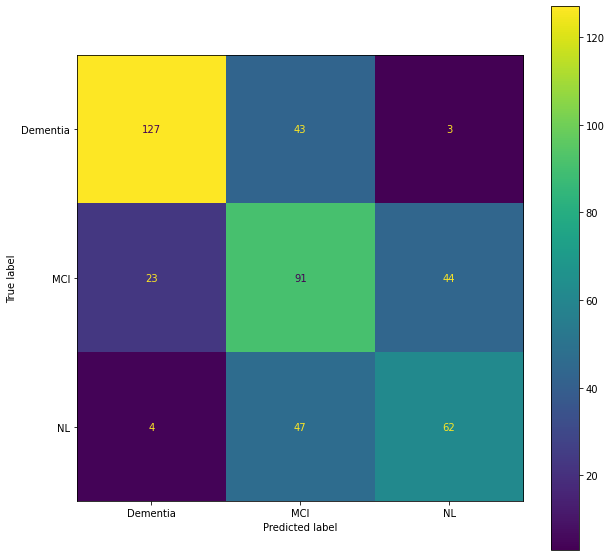

In [13]:
#Let's visualize how well the RF does. 
print(metrics.confusion_matrix(labels_test, labels_pred))
fig, ax = plt.subplots(figsize=(10, 10)) 
metrics.plot_confusion_matrix(rf, features_test, labels_test, values_format = '.5g', ax=ax)

In [14]:
from sklearn.metrics import accuracy_score
# We want to check the accuracy in predicting the test data to make sure the model is not overfitted to the training data
accuracy = accuracy_score(labels_test, labels_pred)
print("Accuracy: %.1f%%" % (accuracy * 100))

Accuracy: 63.1%


## See what happens if we increase the number of trees in the random forest. 

In [15]:
for num_trees in [1,2, 3, 5, 8, 10,20,100,200,1000,2000,3000]:
  rf = RandomForestClassifier(n_estimators = num_trees, max_features = 'auto', bootstrap = True, random_state = 42)
  rf.fit(features_train, labels_train);
  labels_pred = rf.predict(features_test)
  accuracy = accuracy_score(labels_test, labels_pred)
  print("num_trees: %.d" %  num_trees, end = " ")
  print("Accuracy: %.1f%%" % (accuracy * 100))

num_trees: 1 Accuracy: 50.2%
num_trees: 2 Accuracy: 55.6%
num_trees: 3 Accuracy: 54.7%
num_trees: 5 Accuracy: 55.4%
num_trees: 8 Accuracy: 59.9%
num_trees: 10 Accuracy: 61.5%
num_trees: 20 Accuracy: 61.9%
num_trees: 100 Accuracy: 63.3%
num_trees: 200 Accuracy: 63.5%
num_trees: 1000 Accuracy: 63.1%
num_trees: 2000 Accuracy: 63.5%
num_trees: 3000 Accuracy: 63.1%


In [16]:
#OK, let's do that again, but save the data in a little dataframe so that we can plot it. 
#Plots are nicer! I also calculate the time it takes to do make the random forest. 
import time
numtreeslist = [] #creates an empty list 
accuracylist = []
timeneededlist=[]

for num_trees in [1,2, 3, 5, 8, 10,20,100,200,1000,2000,3000]:
  start = time.time()
  rf = RandomForestClassifier(n_estimators = num_trees, max_features = 'auto', bootstrap = True, random_state = 42)
  rf.fit(features_train, labels_train);
  labels_pred = rf.predict(features_test)
  accuracy = accuracy_score(labels_test, labels_pred)
  numtreeslist.append(num_trees)
  accuracylist.append(accuracy)
  end = time.time()
  timeneededlist.append(end - start)


data = {'NumTrees': numtreeslist, 'Accuracy': accuracylist, "TimeNeeded" : timeneededlist}
# Create DataFrame.
df = pd.DataFrame(data)

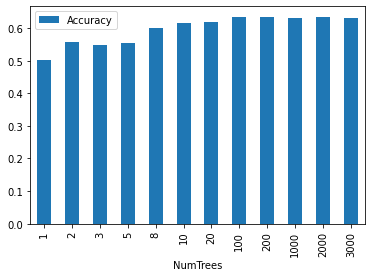

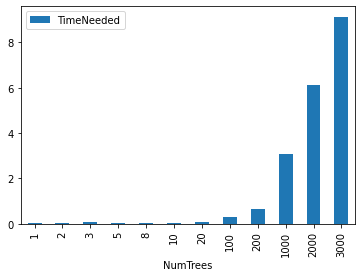

In [17]:
df.plot.bar(x='NumTrees', y='Accuracy')
df.plot.bar(x='NumTrees', y='TimeNeeded')

## Assignment 1

How many trees do you think is a good number to choose for the random forest model? 
Explain your choice based on the accuracy and the time it takes to create the forest model. 

20 trees seem like a good number of trees.
Reason: After 20 trees, there is diminishing returns. The accuract doesn't change much and time taken is too long for it to matter

##Now, let's look at the number of features used in each tree and the max depth of the trees. 

In [24]:
num_trees = 200
flist = []
alist = []
tlist = []
for num_features in range(1,10):
  start = time.time()
  flist.append(num_features)
  rf = RandomForestClassifier(n_estimators = num_trees, max_features = num_features, bootstrap = True, random_state = 42)
  rf.fit(features_train, labels_train);
  labels_pred = rf.predict(features_test)
  accuracy = accuracy_score(labels_test, labels_pred)
  alist.append(accuracy)
  end = time.time()
  tlist.append(end - start)
  print("num_features: %.d" %  num_features, end = " ")
  print("Accuracy: %.1f%%" % (accuracy * 100))

num_features: 1 Accuracy: 63.7%
num_features: 2 Accuracy: 63.7%
num_features: 3 Accuracy: 63.5%
num_features: 4 Accuracy: 62.8%
num_features: 5 Accuracy: 63.5%
num_features: 6 Accuracy: 62.4%
num_features: 7 Accuracy: 62.6%
num_features: 8 Accuracy: 61.5%
num_features: 9 Accuracy: 62.4%


[0.4949057102203369,
 0.5607278347015381,
 0.6253979206085205,
 0.7065386772155762,
 0.8287816047668457,
 0.8666994571685791,
 0.9016995429992676,
 1.0469305515289307,
 1.060204267501831]

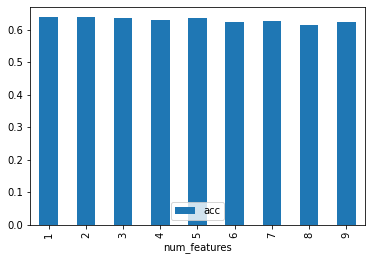

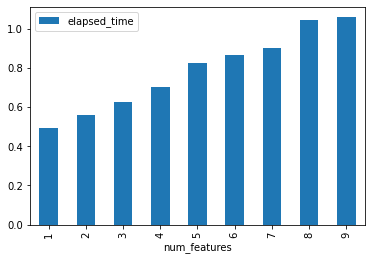

In [25]:
data = {"acc":alist, "num_features":flist, "elapsed_time":tlist}
df = pd.DataFrame(data)
df.plot.bar(x='num_features', y='acc')
df.plot.bar(x='num_features', y='elapsed_time')

In [27]:
num_trees = 200
num_features = 2
max_depthlist = [1,2,3]+list(range(4,30,3))+[35,50]
dlist = []
alist = []
tlist = []
for max_depth in max_depthlist:
  start = time.time()
  dlist.append(max_depth)
  rf = RandomForestClassifier(n_estimators = num_trees, max_features = num_features, max_depth = max_depth, bootstrap = True, random_state = 2)
  rf.fit(features_train, labels_train);
  labels_pred = rf.predict(features_test)
  accuracy = accuracy_score(labels_test, labels_pred)
  alist.append(accuracy)
  end = time.time()
  tlist.append(end - start)
  print("max_depth: %.d" %  max_depth, end = " ")
  print("Accuracy: %.1f%%" % (accuracy * 100))

max_depth: 1 Accuracy: 56.5%
max_depth: 2 Accuracy: 57.0%
max_depth: 3 Accuracy: 58.1%
max_depth: 4 Accuracy: 60.8%
max_depth: 7 Accuracy: 65.3%
max_depth: 10 Accuracy: 64.2%
max_depth: 13 Accuracy: 64.4%
max_depth: 16 Accuracy: 65.1%
max_depth: 19 Accuracy: 63.5%
max_depth: 22 Accuracy: 63.3%
max_depth: 25 Accuracy: 63.7%
max_depth: 28 Accuracy: 63.7%
max_depth: 35 Accuracy: 63.7%
max_depth: 50 Accuracy: 63.7%


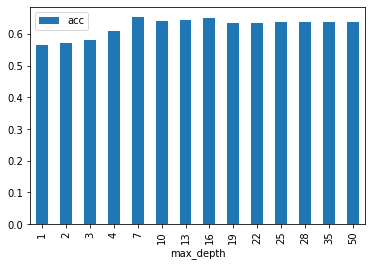

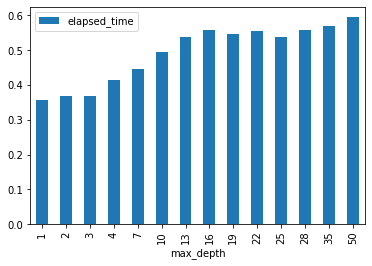

In [28]:
data = {"acc":alist, "max_depth":dlist,"elapsed_time":tlist}
df = pd.DataFrame(data)
df.plot.bar(x='max_depth', y='acc')
df.plot.bar(x='max_depth', y='elapsed_time')

## Assignment 2
1. Create plots for the last two code blocks where we looked at the number of features and the maximum depth of the tree. 
You can reuse the code from the previous code blocks. 
2. What do you think is a good number of features and a good maximum depth for the trees? Explain your answer. 

1. Created plots for both num_features and max_depth
2. Num_features = 2; Max_depth = 7. We have good accuracy for these values and the time taken to run the model is not too much. A good bang for the buck occurs in this sweet spot 

## Let's have a look at two hyper parameters at the same time in a nested loop. 
Then we'll use the plotnine package to show a heatmap of what combination of parameter values gives us what accuracy. 

In [29]:
accuracylist = []
num_features_list=[]
max_depthlist = []

max_depthlist_forloop = [1,2,3]+list(range(4,30,3))+[35,50]
for max_depth in max_depthlist_forloop:
  for num_features in range(1,12):
    rf = RandomForestClassifier(n_estimators = num_trees, max_features = num_features, max_depth = max_depth, bootstrap = True, random_state = 1)
    rf.fit(features_train, labels_train);
    labels_pred = rf.predict(features_test)
    accuracy = accuracy_score(labels_test, labels_pred)
    num_features_list.append(num_features)
    accuracylist.append(round(accuracy,2))
    max_depthlist.append(max_depth)

data = {'Num_features': num_features_list, 'Accuracy': accuracylist, "MaxDepth" : max_depthlist}
# Create DataFrame.
df_features_depth = pd.DataFrame(data)


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


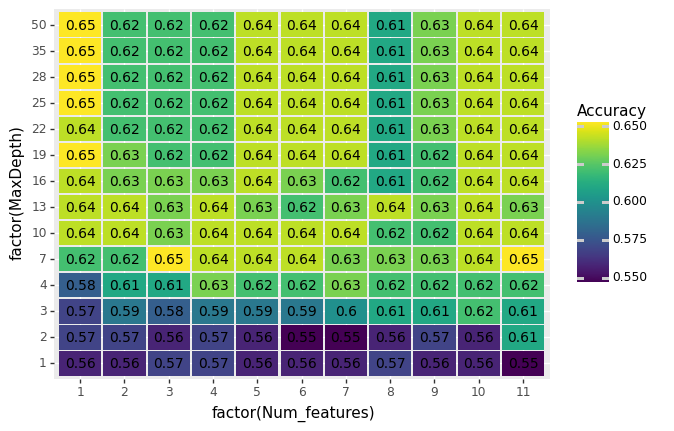

<ggplot: (8787313096885)>

In [30]:
from plotnine import *
(ggplot(df_features_depth, aes('factor(Num_features)', 'factor(MaxDepth)', fill='Accuracy'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='Accuracy'), size=10)  # modified
)

## Assignment 3
1. If you use a different random state, will you get different answers? 
What if you and one other member of your team run the code with a different random state, or the same, do you get the same or a different heatmap? 

- tried random state = 42(code below)
- The heatmap looked more or less the same. This is the result we want to prove the algorithm converges

In [36]:
accuracylist = []
num_features_list=[]
max_depthlist = []

#Random state: 42
max_depthlist_forloop = [1,2,3]+list(range(4,30,3))+[35,50]
for max_depth in max_depthlist_forloop:
  for num_features in range(1,12):
    rf = RandomForestClassifier(n_estimators = num_trees, max_features = num_features, max_depth = max_depth, bootstrap = True, random_state = 42)
    rf.fit(features_train, labels_train);
    labels_pred = rf.predict(features_test)
    accuracy = accuracy_score(labels_test, labels_pred)
    num_features_list.append(num_features)
    accuracylist.append(round(accuracy,2))
    max_depthlist.append(max_depth)

data = {'Num_features': num_features_list, 'Accuracy': accuracylist, "MaxDepth" : max_depthlist}
# Create DataFrame.
df_features_depth = pd.DataFrame(data)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


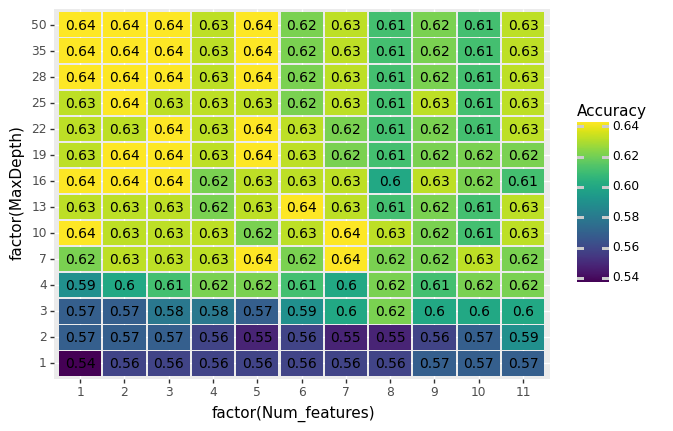

<ggplot: (8787313035397)>

In [37]:
from plotnine import *
(ggplot(df_features_depth, aes('factor(Num_features)', 'factor(MaxDepth)', fill='Accuracy'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='Accuracy'), size=10)  # modified
)

# Boosted trees 

OK, here we are going to do some hyper parameter tuning for our boosted trees model. 

In [38]:
from xgboost import XGBClassifier
modelXGB = XGBClassifier()
modelXGB.fit(features_train,labels_train)
labels_pred_XGB = modelXGB.predict(features_test)
accuracyXGB = accuracy_score(labels_test, labels_pred_XGB)
print("Accuracy: %.1f%%" % (accuracyXGB * 100))

Accuracy: 64.4%


In [39]:
from xgboost import XGBClassifier
modelXGB = XGBClassifier(max_depth = max_depth, learning_rate = 0.01)
modelXGB.fit(features_train,labels_train)
labels_pred_XGB = modelXGB.predict(features_test)
accuracyXGB = accuracy_score(labels_test, labels_pred_XGB)
print("Accuracy: %.1f%%" % (accuracyXGB * 100))

Accuracy: 62.8%


In [40]:
from xgboost import XGBClassifier
modelXGB = XGBClassifier(max_depth = max_depth, learning_rate = 0.2)
modelXGB.fit(features_train,labels_train)
labels_pred_XGB = modelXGB.predict(features_test)
accuracyXGB = accuracy_score(labels_test, labels_pred_XGB)
print("Accuracy: %.1f%%" % (accuracyXGB * 100))

Accuracy: 61.7%


[[124  43   6]
 [ 24  88  46]
 [  6  40  67]]


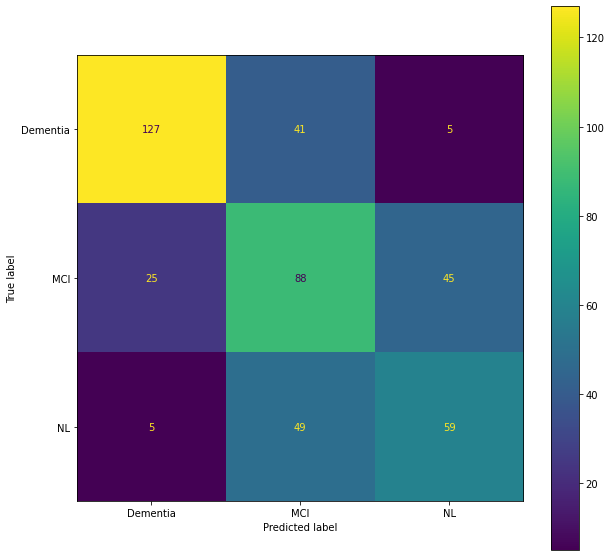

In [41]:
print(metrics.confusion_matrix(labels_test, labels_pred))
fig, ax = plt.subplots(figsize=(10, 10)) 
metrics.plot_confusion_matrix(modelXGB, features_test, labels_test, values_format = '.5g', ax=ax)

## Assignment 4

1. Look at the learning rate and see which value between 0.01 and 0.2 is best (modelXGB = XGBClassifier(max_depth = max_depth, learning_rate = learning_rate)
2. Look at the maximum depth of the trees in the boosted trees model and see which depth is best. 
3. Look at the combination of depth and learning rate and see if there is a specific combination that is best. For this part of the assignment, you need to create a nested loop and use plotnine to plot the results in a heatmap. 
4. For each line of code in the codeblocks where you made the heatmap and the nested loop, write a comment after each line of code to describe in your own words what that line of code does. If you don't know exactly, write in your own words why you are not sure. 

You can write the code with your team mates, but the comments need to be written by you and so they need to be different for every student. 
Make a few screenshots of your code and notes to share in your Word file for iLearn. 

In [55]:
accuracylist = [] # list to store result
ll_list=[] # list to store result
max_depthlist = [] # list to store result
from xgboost import XGBClassifier #import classifier
import numpy as np #import numpy for arange function

max_depthlist_forloop = [1,2,3]+list(range(4,30,3))+[35,50] #max_depth to iterate over
for max_depth in max_depthlist_forloop:
  for lrate in np.arange(0.01, 0.21, 0.025): # learning rates to iterate over
    modelXGB = XGBClassifier(max_depth = max_depth, learning_rate = lrate) #Initialize model
    modelXGB.fit(features_train,labels_train) # fit the model
    labels_pred_XGB = modelXGB.predict(features_test) # predict using the model
    accuracyXGB = accuracy_score(labels_test, labels_pred_XGB) # calculate accuracy
    ll_list.append(lrate) # save learning rate
    accuracylist.append(round(accuracy,2)) # round accuracy + save
    max_depthlist.append(max_depth) # save_result

data = {'learning_rate': ll_list, 'Accuracy': accuracylist, "MaxDepth" : max_depthlist} # Dict for plotting 
# Create DataFrame.
df_features_depth = pd.DataFrame(data) # Create Dataframe


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


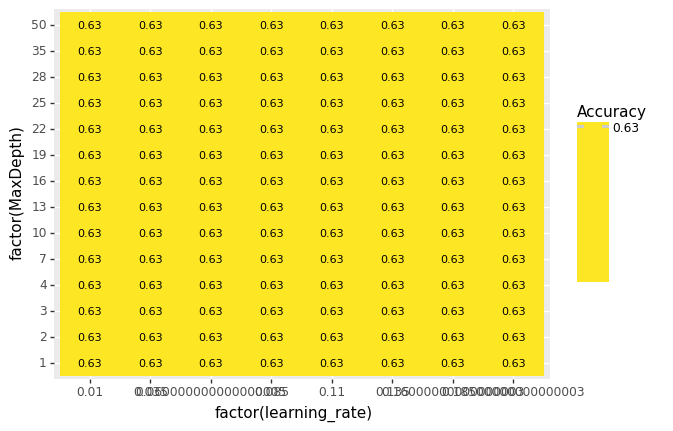

<ggplot: (8787311732445)>

In [56]:

from plotnine import *
# GGPLOT heatmap
(ggplot(df_features_depth, aes('factor(learning_rate)', 'factor(MaxDepth)', fill='Accuracy'))
 + geom_tile(aes(width=1, height=1))
 + geom_text(aes(label='Accuracy'), size=8)  # modified
)

## Assignment 5 

Read the blog post and choose one additional hyper parameter to look at in the colab notebook. Describe the parameter you chose and describe whether or not it had an effect (on your random forest or boosted tree model – your choice). 

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/


- subsample - selects a fraction of the dataset. This sample is randomly chosen to avoid any problems with the ordering of the dataset. I chose 0.8

In [57]:
modelXGB = XGBClassifier(max_depth = 5, learning_rate = 0.01, subsample=0.8) #Initialize model
modelXGB.fit(features_train,labels_train) # fit the model
labels_pred_XGB = modelXGB.predict(features_test) # predict using the model
accuracyXGB = accuracy_score(labels_test, labels_pred_XGB) # calculate accuracy

In [58]:
accuracyXGB

0.6396396396396397

Write a summary of the video using at least the words – if some of these words are unclear to you, please write that too!

Dr.Rosie Redfield talks about genetic variations in populations. In a genome sequence, at any position, there could four different alleles. 
A
G
C - Cytosine
T - Thyamine
One person could have two different alleles. For every two alleles, three different genotypes are possible. Single Nucleotide Polymorphism occurs when the two alleles at the same position are different. 

- What is the goal of a GWAS study? 
 - *A genome-wide association study (GWAS) is an approach used in genetics research to associate specific genetic variations with particular diseases.*
- How many SNPs do you need for a GWAS study? 
 - 10^6
- How many cases and controls (sick and healthy people) do you need for a GWAS study? 
 - The video just says thousands of people. Doesn't give an exact number
 - Isolate the DNA
 - Use DNA chip
 - Identify SNP
 - Genotype
 - Mark positions in SNPs where the allele frequencies differ
 - Visualize using Manhattan plot
 - Not very effective when heritability is lower

In [ ]:
1. 